In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime
import scipy.stats as stats
import plotly.graph_objects as go
import sklearn
from keras.utils import to_categorical

In [322]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import backend as K

In [323]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [324]:
train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

In [325]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [326]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [327]:
#train.drop(['RoofMatl','MasVnrType','Exterior2nd','Exterior1st','MasVnrArea','LowQualFinSF','GarageYrBlt','FireplaceQu','BsmtHalfBath','BsmtFullBath'], axis=1, inplace=True)

In [328]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [329]:
train.drop(['Alley','MiscFeature','Fence','PoolQC','GarageCond','GarageQual','FireplaceQu'], axis=1, inplace=True)

In [330]:
LotMean = train[train['LotFrontage'].isna()==False]['LotFrontage'].mean()
train.fillna( LotMean,inplace=True)


In [331]:
train.groupby('Street').size()

Street
Grvl       6
Pave    1454
dtype: int64

In [332]:
train.drop(['Street'], axis=1, inplace=True)

In [333]:
train.groupby('Utilities').size()

Utilities
AllPub    1459
NoSeWa       1
dtype: int64

In [334]:
train.drop(['Utilities'], axis=1, inplace=True)

In [335]:
train[train['BsmtQual']== 70.04995836802665]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Reg,Lvl,Inside,Gtl,Sawyer,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Reg,Lvl,Inside,Gtl,Edwards,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Reg,Bnk,Inside,Gtl,SawyerW,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Reg,Lvl,Inside,Gtl,Edwards,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Reg,Lvl,Inside,Gtl,OldTown,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,343,90,RL,70.049958,8544,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Reg,Lvl,Corner,Gtl,Edwards,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.000000,17120,Reg,Lvl,Inside,Gtl,ClearCr,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [336]:
train['BsmtQual'].replace(to_replace=70.04995836802665, value='Po',inplace=True)

In [337]:
train['BsmtCond'].replace(to_replace=70.04995836802665, value='Fa',inplace=True)

In [338]:
train.groupby('BsmtQual').size()

BsmtQual
Ex    121
Fa     35
Gd    618
Po     37
TA    649
dtype: int64

In [339]:
train.drop(train[train['MasVnrType']== 70.04995836802665].index, axis=0, inplace=True)

#### EDA : exploratory data analysis

the figure below demonstrate each variables and their values

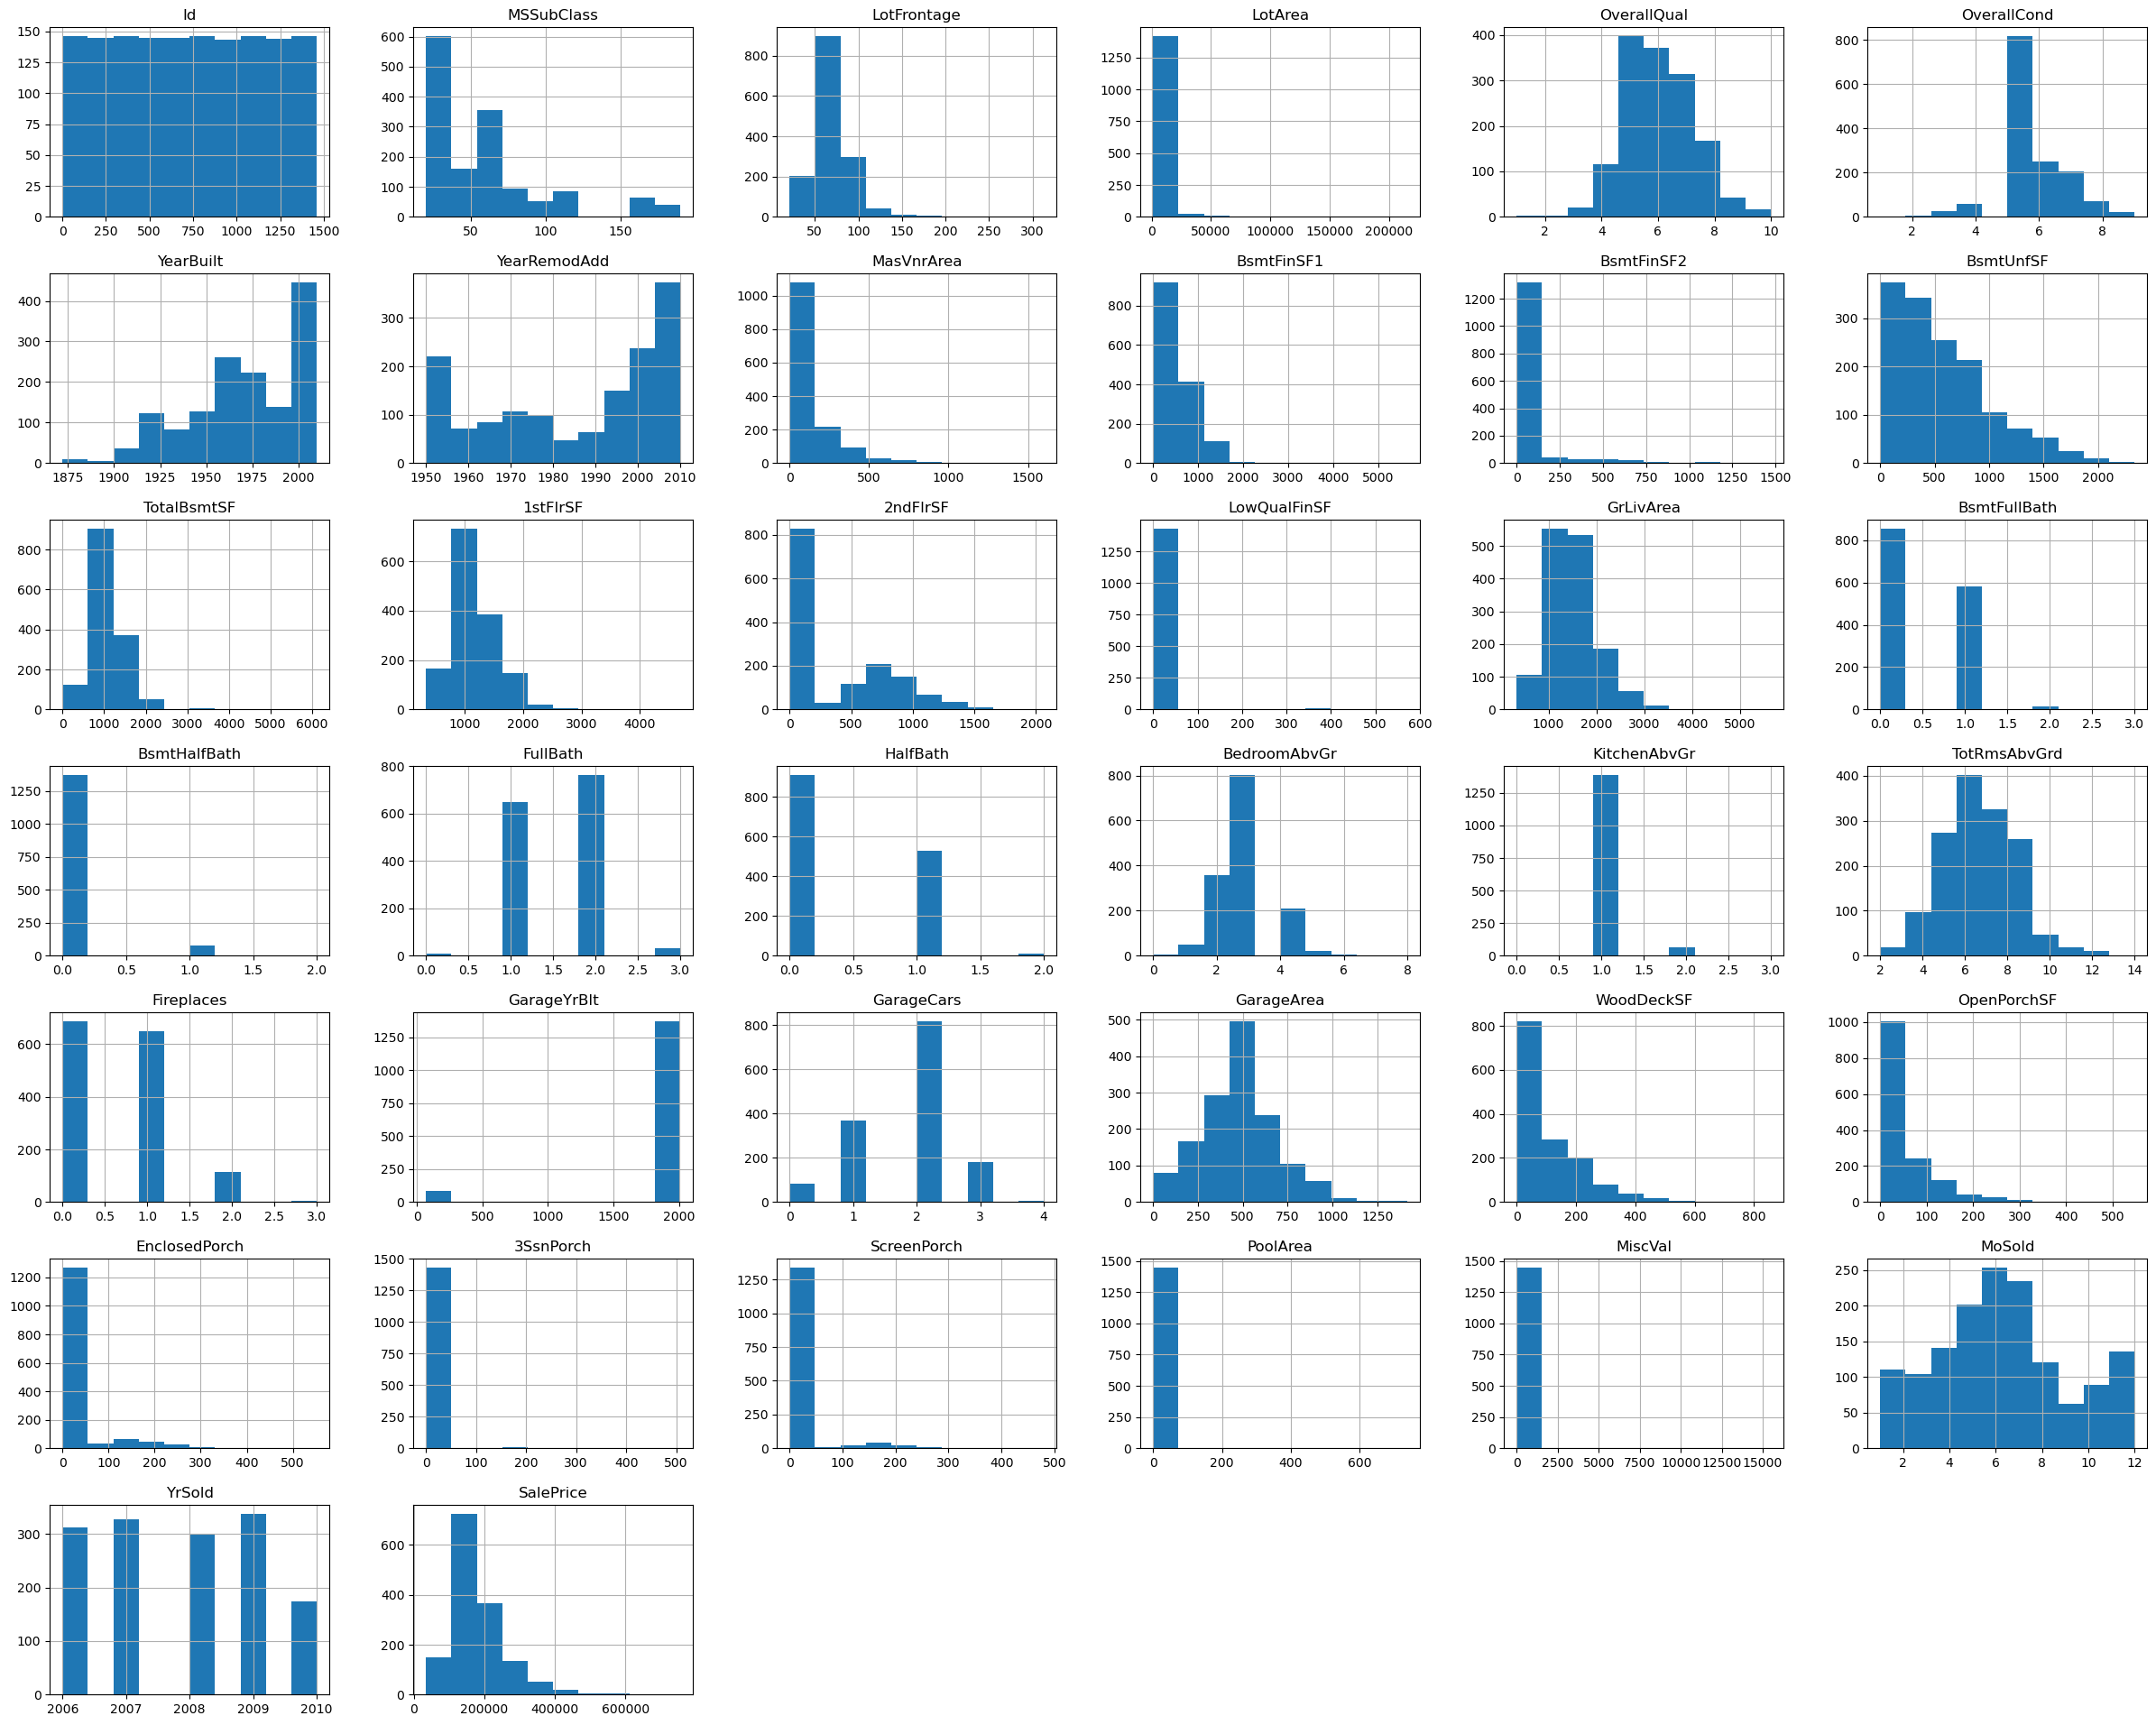

In [340]:
train.hist(figsize=(30,24))
plt.show()

In [341]:
fig = px.histogram(train, x="SalePrice")
fig.show()

In [342]:
from scipy import stats

# Calculate Z-values
train['SalePrice_z'] = np.abs(stats.zscore(train['SalePrice']))

# Filter out outliers
train = train[train['SalePrice_z'] <= 3]

# Remove houses listed for $0
train = train[train['SalePrice'] != 0]

# Drop the column
train = train.drop('SalePrice_z', axis=1)

# Draw a histogram
fig = px.histogram(train, x="SalePrice")
fig.show()

### encode Categorical features


     MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond

In [343]:
def findUnique(colNames):
    for colName in colNames:
        print(colName)
        print(train[colName].unique())

In [344]:
findUnique(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
  'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation'])

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']
MasVnrType
['BrkFace' 'None' 'Stone' 'BrkCmn']
Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


In [345]:
train.groupby('Condition1').size()

Condition1
Artery      47
Feedr       81
Norm      1233
PosA         8
PosN        19
RRAe        11
RRAn        25
RRNe         2
RRNn         5
dtype: int64

In [346]:
train.groupby('Condition2').size()

Condition2
Artery       2
Feedr        6
Norm      1416
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         2
dtype: int64

In [347]:
train.groupby('RoofStyle').size()

RoofStyle
Flat         13
Gable      1128
Gambrel      11
Hip         270
Mansard       7
Shed          2
dtype: int64

In [348]:
train.groupby('RoofMatl').size()

RoofMatl
ClyTile       1
CompShg    1407
Membran       1
Metal         1
Roll          1
Tar&Grv      11
WdShake       5
WdShngl       4
dtype: int64

In [349]:
train.drop(['RoofStyle','RoofMatl','Condition2','Condition1'], axis=1, inplace=True)

In [396]:
columns = ['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
  'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation']

for col in columns:
  print(col)
  train = pd.get_dummies(data = train,prefix=col,columns=[col],drop_first=True)


MSZoning
LotConfig
Neighborhood
BldgType
HouseStyle
Exterior1st
Exterior2nd
MasVnrType
Foundation


KeyError: "None of [Index(['Foundation'], dtype='object')] are in the [columns]"

In [397]:
train

,LotFrontage,LotArea,LotShape,LandContour,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,4,4,7,2003,2003,196.0,4,4,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,4,4,6,1976,1976,0.0,3,4,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,3,4,7,2001,2002,162.0,4,4,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,3,4,7,1915,1970,0.0,3,3,...,0,0,0,0,0,0,1,0,1,0
4,84.0,14260,3,4,8,2000,2000,350.0,4,4,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,4,6,1999,2000,0.0,3,4,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,4,4,6,1978,1988,119.0,3,4,...,0,1,0,0,0,0,0,0,0,1
1457,66.0,9042,4,4,7,1941,2006,0.0,5,3,...,0,0,0,0,0,0,0,0,1,0
1458,68.0,9717,4,4,5,1950,1996,0.0,3,3,...,0,0,0,0,0,0,0,0,1,0


### Encode Ordinal Features

'LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond'

In [351]:
findUnique(['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond'])

LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LandSlope
['Gtl' 'Mod' 'Sev']
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual
['Gd' 'TA' 'Ex' 'Po' 'Fa']
BsmtCond
['TA' 'Gd' 'Fa' 'Po']


In [352]:
def encode_ordinal(col,values):
    for i in range(len(values)):
        train[col].replace({values[i]:i+1},inplace=True)

In [353]:
encode_ordinal('LandSlope',['Gtl','Mod','Sev'])

In [354]:
encode_ordinal('LandContour',['Low', 'HLS', 'Bnk', 'Lvl'])

In [355]:
encode_ordinal('BsmtQual',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [356]:
encode_ordinal('ExterCond',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [357]:
encode_ordinal('ExterQual',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [358]:
encode_ordinal('BsmtCond',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [359]:
encode_ordinal('LotShape',['IR3', 'IR2', 'IR1','Reg' ])

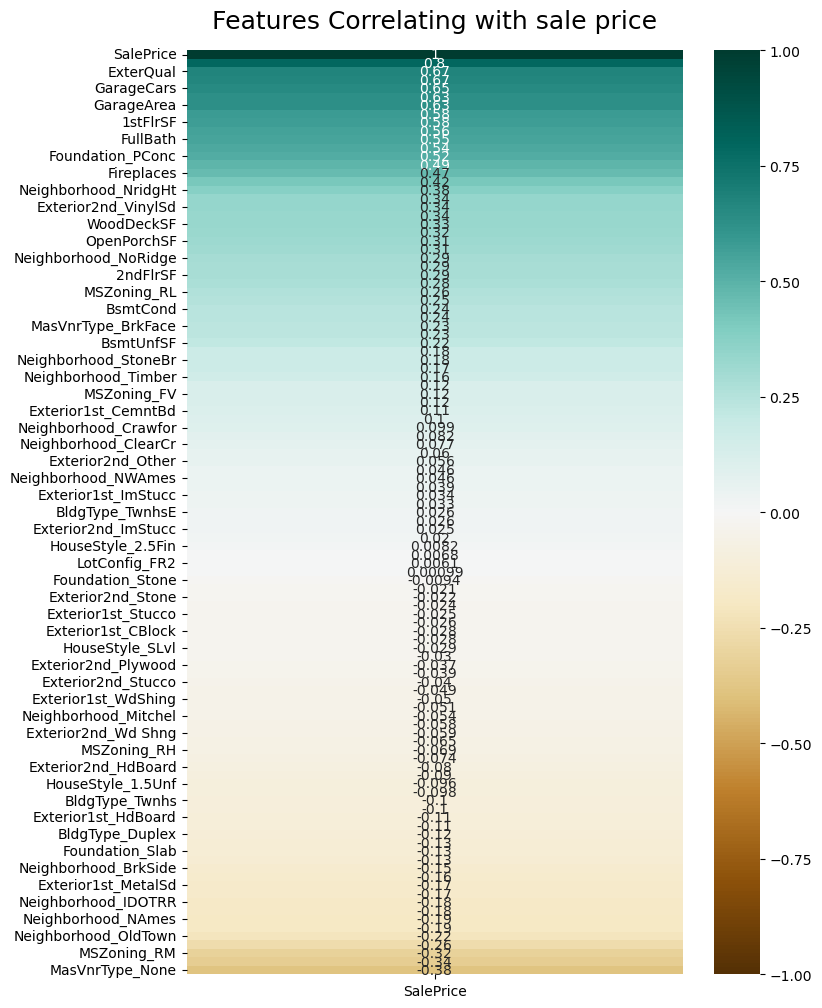

In [398]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with sale price', fontdict={'fontsize':18}, pad=16);

drop any column between -0.10 and 0.10

In [361]:
train.drop(['Id','PoolArea','MoSold','3SsnPorch','ScreenPorch','BsmtHalfBath','BsmtFinSF2','MiscVal','LowQualFinSF','YrSold','LandContour','LandSlope','ExterCond','EnclosedPorch','KitchenAbvGr','OverallCond','MSSubClass'], axis=1, inplace=True)

split data

In [400]:
train_dataset = train.sample(frac=0.8, random_state=0)
test_dataset = train.drop(train_dataset.index)

In [401]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('SalePrice')
test_labels = test_features.pop('SalePrice')

In [402]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
LotFrontage,69.636848,22.412680
LotArea,10455.310044,10730.659934
LotShape,3.602620,0.573445
LandContour,3.807860,0.617157
OverallQual,6.042795,1.299174
...,...,...
Exterior2nd_Wd Sdng,0.146725,0.353986
Exterior2nd_Wd Shng,0.025328,0.157187
MasVnrType_BrkFace,0.306550,0.461262
MasVnrType_None,0.600000,0.490112


### Normalize values

In [419]:
train_stats = train_dataset.describe()
train_stats.pop('SalePrice')
train_stats = train_stats.transpose()

In [420]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']
normed_train = norm(train_dataset)
normed_test = norm(test_dataset)

In [441]:
normed_train.dropna(axis=1,inplace=True)

In [450]:
normed_test.dropna(axis=1,inplace=True)

### Simple Linear Regression

OverallQual

In [403]:
OverallQual = np.array(train_features['OverallQual'])

OverallQual_normalizer = layers.Normalization(input_shape=[1,], axis=None)
OverallQual_normalizer.adapt(OverallQual)

In [404]:
OverallQual_model = tf.keras.Sequential([
    OverallQual_normalizer,
    layers.Dense(units=1)
])

OverallQual_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [405]:
OverallQual_model.predict(OverallQual[:10])

1/1 [==============================] - 0s 30ms/step


array([[ 0.00953379],
       [-0.21323596],
       [-0.21323596],
       [-0.21323596],
       [ 0.00953379],
       [ 0.4550733 ],
       [-0.21323596],
       [ 0.23230353],
       [ 0.00953379],
       [-0.43600568]], dtype=float32)

In [406]:
OverallQual_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

hyperparameter tuning 

In [407]:
history = OverallQual_model.fit(
    train_features['OverallQual'],
    train_labels,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [408]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,175464.578125,170585.187500,195
196,175461.625000,170582.328125,196
197,175458.765625,170579.390625,197
198,175455.875000,170576.531250,198
199,175452.953125,170573.625000,199


In [409]:
hist[hist['loss']==(hist['loss'].min())]

,loss,val_loss,epoch
199,175452.953125,170573.625,199


In [410]:
def plot_loss(history):
  plt.plot(history['loss'], label='loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [OverallQual]')
  plt.legend()
  plt.grid(True)

In [411]:
hist['loss']

0      176030.406250
1      176027.515625
2      176024.609375
3      176021.718750
4      176018.781250
           ...      
195    175464.578125
196    175461.625000
197    175458.765625
198    175455.875000
199    175452.953125
Name: loss, Length: 200, dtype: float64

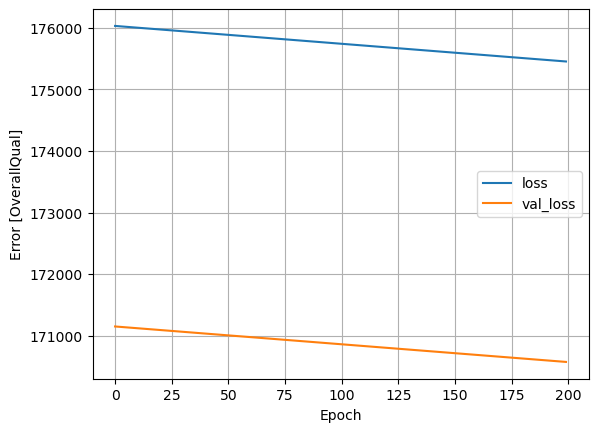

In [412]:
plot_loss(hist)

In [413]:
test_results = {}
test_results['OverallQual_model'] = OverallQual_model.evaluate(
    test_features['OverallQual'],
    test_labels, verbose=0)

In [414]:
predictions = OverallQual_model.predict(test_features['OverallQual'])
predictions = np.ravel(predictions)
predictions[:5]

9/9 [==============================] - 0s 746us/step


array([657.4791, 552.6859, 552.6859, 631.2808, 552.6859], dtype=float32)

In [415]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [416]:
rmse(test_labels, predictions).numpy()

190527.67842363697

In [417]:
test_labels

11      345000
23      129900
24      154000
25      256300
28      207500
         ...  
1426    271000
1436    120500
1439    197000
1447    240000
1455    175000
Name: SalePrice, Length: 286, dtype: int64

In [418]:
predictions

array([657.4791 , 552.6859 , 552.6859 , 631.2808 , 552.6859 , 631.2808 ,
       552.6859 , 552.6859 , 552.6859 , 552.6859 , 605.0825 , 526.4876 ,
       605.0825 , 552.6859 , 500.28934, 631.2808 , 578.8842 , 500.28934,
       552.6859 , 578.8842 , 578.8842 , 526.4876 , 578.8842 , 552.6859 ,
       605.0825 , 552.6859 , 578.8842 , 578.8842 , 552.6859 , 605.0825 ,
       578.8842 , 605.0825 , 526.4876 , 605.0825 , 552.6859 , 578.8842 ,
       552.6859 , 631.2808 , 631.2808 , 552.6859 , 578.8842 , 552.6859 ,
       552.6859 , 605.0825 , 526.4876 , 578.8842 , 552.6859 , 552.6859 ,
       552.6859 , 605.0825 , 552.6859 , 605.0825 , 683.6774 , 605.0825 ,
       631.2808 , 605.0825 , 578.8842 , 631.2808 , 526.4876 , 657.4791 ,
       605.0825 , 578.8842 , 631.2808 , 552.6859 , 578.8842 , 578.8842 ,
       552.6859 , 631.2808 , 578.8842 , 605.0825 , 578.8842 , 578.8842 ,
       605.0825 , 578.8842 , 552.6859 , 578.8842 , 552.6859 , 447.89276,
       657.4791 , 605.0825 , 605.0825 , 526.4876 , 

YearBuilt


MSSubClass

### Multiple Linear Regression

In [446]:
def build_model():
    model = tf.keras.Sequential([
    layers.Dense(64,activation=tf.nn.relu, input_shape=[len(normed_train.keys())]),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(1)
])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='mse',
        metrics=['mae','mse'])

    return model


In [447]:
model = build_model()

In [448]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                6976      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [449]:

example =np.asarray(normed_train[:10]).astype(np.float32)
example_results = model.predict(example)
example_results

1/1 [==============================] - 0s 32ms/step


array([[-0.29123297],
       [-0.9349043 ],
       [-1.3847877 ],
       [-0.5205851 ],
       [-0.07992316],
       [-1.0125152 ],
       [-0.43322182],
       [-0.44367015],
       [-0.6285691 ],
       [-1.31539   ]], dtype=float32)

In [451]:
history = model.fit(
    normed_train,
    train_labels,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [452]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,985504128.0,21980.775391,985504128.0,2.064430e+09,30019.925781,2.064430e+09,195
196,981112064.0,21950.671875,981112064.0,2.057470e+09,29995.222656,2.057470e+09,196
197,972471872.0,21831.238281,972471872.0,2.048224e+09,29809.544922,2.048224e+09,197
198,967098496.0,21769.412109,967098496.0,2.044316e+09,29779.830078,2.044316e+09,198
199,960324608.0,21712.673828,960324608.0,2.037068e+09,29727.271484,2.037068e+09,199


In [453]:
loss,mae,mse=model.evaluate(normed_test,test_labels,verbose=0)

In [457]:
mae

22882.32421875

9/9 [==============================] - 0s 995us/step


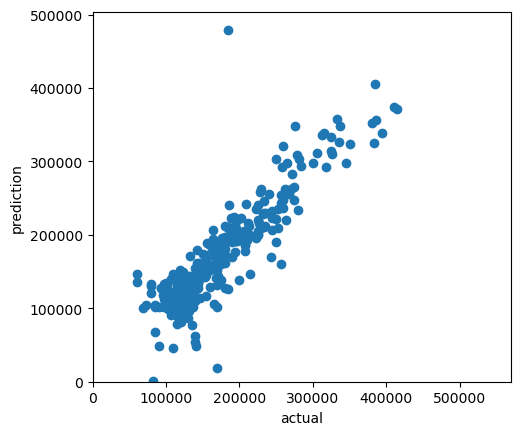

In [458]:
test_predictions = model.predict(normed_test).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,100])

### Loss function

### Determining the right number of epochs